HYPOTHESIS 3 : Test if power consumption is higher in summer months compared to winter months.

The hypotheses being tested are:

H₀: μ_summer ≤ μ_winter (Summer power consumption is less than or equal to winter)
H₁: μ_summer > μ_winter (Summer power consumption is higher than winter)


For comparing power consumption between winter and summer months, we can use a z-test for Two Population Mean since we're comparing the means of two independent groups (winter months vs summer months). Given that we have a large dataset (multiple readings per day), a z-test would be appropriate.


We use a z-test for Two Population Mean to compare winter and summer power consumption


The z-test is appropriate here because:

We're comparing means of two independent groups
We have a large sample size
We're interested in whether one population mean is greater than the other
The data is continuous (power consumption)

The code provides both statistical evidence and visual confirmation of any seasonal patterns in power consumption.


Z-test Results for Seasonal Power Consumption:
-------------------------------------------
Testing H₀: μ_summer ≤ μ_winter vs H₁: μ_summer > μ_winter

Summer Mean: 0.6759 kW
Winter Mean: 1.1765 kW
Summer Standard Deviation: 0.6142
Winter Standard Deviation: 0.8929
Sample sizes - Summer: 655760, Winter: 610211

z-statistic: -364.9282
p-value (one-tailed): 1.0000

Interpretation:
--------------
Fail to reject the null hypothesis.
There is insufficient evidence that power consumption is higher in summer months.

The difference in means (Summer - Winter) is -0.5006 kW


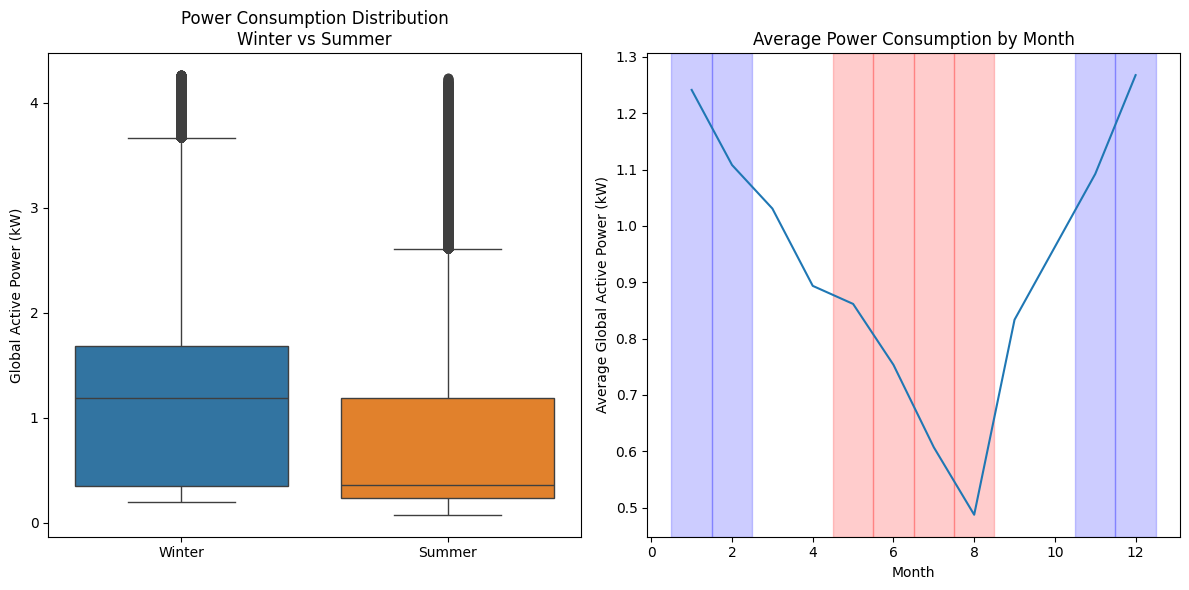

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_seasonal_power(df):

    winter_months = [11, 12, 1, 2]  # November, December, January, February
    summer_months = [5, 6, 7, 8]   # May, June, July, August
    
    winter_data = df[df['month'].isin(winter_months)]['Global_active_power']
    summer_data = df[df['month'].isin(summer_months)]['Global_active_power']
    
    winter_mean = winter_data.mean()
    summer_mean = summer_data.mean()
    winter_std = winter_data.std()
    summer_std = summer_data.std()
    winter_n = len(winter_data)
    summer_n = len(summer_data)
    
    pooled_std = np.sqrt((winter_std**2/winter_n) + (summer_std**2/summer_n))
    z_stat = (summer_mean - winter_mean) / pooled_std
    
    p_value = 1 - stats.norm.cdf(z_stat)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    seasonal_data = {
        'Winter': winter_data,
        'Summer': summer_data
    }
    sns.boxplot(data=seasonal_data)
    plt.title('Power Consumption Distribution\nWinter vs Summer')
    plt.ylabel('Global Active Power (kW)')
    
    
    plt.subplot(1, 2, 2)
    monthly_avg = df.groupby('month')['Global_active_power'].mean()
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
    plt.title('Average Power Consumption by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Global Active Power (kW)')

    for month in winter_months:
        plt.axvspan(month-0.5, month+0.5, alpha=0.2, color='blue')
    for month in summer_months:
        plt.axvspan(month-0.5, month+0.5, alpha=0.2, color='red')

    results = {
        'winter_mean': winter_mean,
        'summer_mean': summer_mean,
        'winter_std': winter_std,
        'summer_std': summer_std,
        'winter_n': winter_n,
        'summer_n': summer_n,
        'z_statistic': z_stat,
        'p_value': p_value,
    }
    
    return results

df = pd.read_csv('data_processed.csv')

results = analyze_seasonal_power(df)

print("\nZ-test Results for Seasonal Power Consumption:")
print("-------------------------------------------")
print("Testing H₀: μ_summer ≤ μ_winter vs H₁: μ_summer > μ_winter")
print(f"\nSummer Mean: {results['summer_mean']:.4f} kW")
print(f"Winter Mean: {results['winter_mean']:.4f} kW")
print(f"Summer Standard Deviation: {results['summer_std']:.4f}")
print(f"Winter Standard Deviation: {results['winter_std']:.4f}")
print(f"Sample sizes - Summer: {results['summer_n']}, Winter: {results['winter_n']}")
print(f"\nz-statistic: {results['z_statistic']:.4f}")
print(f"p-value (one-tailed): {results['p_value']:.4f}")

print("\nInterpretation:")
print("--------------")
if results['p_value'] < 0.05:
    print("Reject the null hypothesis.")
    print("There is significant evidence that power consumption is higher in summer months.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is insufficient evidence that power consumption is higher in summer months.")
print(f"\nThe difference in means (Summer - Winter) is {results['summer_mean'] - results['winter_mean']:.4f} kW")

plt.tight_layout()
plt.show()